# Определение возраста покупателей по фотографии (Computer Vision)


### Для компаний в сферах деятельности:
- Научные отделы / R&D центры / Институты / Резиденты наукоградов
- Информационная безопасность
- Ритейл / E-commerce
- Стартапы
- IT-компания
- Услуги для бизнеса [b2b] (аутсорс консалтинг аудит)

### Задачи проекта:
Построить модель, которая по фотографии определит приблизительный возраст человека. Есть набор фотографий людей с указанием возраста.

### Ключевые слова:
Computer Vision,  Video Analysis, Image, video enhancement (HDR, trailing smear, Image distortion and so on). Stereo Vision and Binocular Calibration. Face/body/vehicle attribute and feature recognition (structured and semi-structured), object detection, Re-ID, Face verification and identification, landmarks, identification tracking algorithm, 3D reconstruction, Structure-from-motion, Image filtration. Augmented reality, Virtual reality, Image retrieval, data science, machine learning, ML, Python, SQL, Git, Pandas, Numpy, Matplotlib, seaborn, Sklearn, Keras, Tableau, Spark, Hadoop, R, sci-py, Research, Kaggle, Algorithms, PyTorch, TensorFlow, CatBoost, RNN, SVN, NLP, DNN, Deep Learning, xgboost, Support vector machines, reccurent neural networks, нейронные сети, градиентный бустинг, нелинейная оптимизация, кластеризация, random forest, descision trees,  regression,  Reinforcement Learning, neural networks, artificial intelligence, OpenCV, PIL

### Навыки и инструменты
Pandas
keras
Matplotlib
Seaborn
компьютерное зрение
машинное обучение

### Описание проекта
Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.
Построена модель, которая по фотографии определит приблизительный возраст человека. 
Проанализирован набор фотографий людей с указанием возраста при помощи компьютерного зрения с привлечением готовых нейронных сетей и библиотеки Keras.

### План по выполнению проекта
- Проведём исследовательский анализ набора фотографий.
- Подготовим данные к обучению.
- Обучим нейронную сеть и рассчитаем её качество.

# 1. Исследовательский анализ данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [3]:
import pandas as pd
import numpy as np
np.random.seed(12345)
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt

In [4]:
from io import BytesIO
import requests
spreadsheet_id = '1mdNL-1q-a8uR9zZr7oDEWn98a1xpoPKnGFOAWdDCL-g'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
labels = pd.read_csv(BytesIO(r.content), sep=';')
labels

# labels = pd.read_csv('http://dds.tw1.ru/faces/labels_face.csv', sep=';')
# labels

,file_name,real_age
0,000000.jpg_face.jpg,4
1,000001.jpg_face.jpg,18
2,000002.jpg_face.jpg,80
3,000003.jpg_face.jpg,50
4,000004.jpg_face.jpg,17
...,...,...
7586,007608.jpg_face.jpg,14
7587,007609.jpg_face.jpg,37
7588,007610.jpg_face.jpg,28
7589,007611.jpg_face.jpg,20


In [5]:
%%time
directory = '/content/drive/MyDrive/Colab Notebooks/15 Проект. Компьютерное зрение: Обработка фотографий покупателей/faces/final_files'
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_flow = train_datagen.flow_from_dataframe(
        validate_filenames=True,
        dataframe=labels,
        directory=directory,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7590 validated image filenames.
CPU times: user 262 ms, sys: 414 ms, total: 676 ms
Wall time: 2min 13s


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


# Анализ

In [6]:
labels

,file_name,real_age
0,000000.jpg_face.jpg,4
1,000001.jpg_face.jpg,18
2,000002.jpg_face.jpg,80
3,000003.jpg_face.jpg,50
4,000004.jpg_face.jpg,17
...,...,...
7586,007608.jpg_face.jpg,14
7587,007609.jpg_face.jpg,37
7588,007610.jpg_face.jpg,28
7589,007611.jpg_face.jpg,20


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Иммет датасет из двух признаков: имя файла фото и возраст. Без пропусков. Папка фото содержит 7591 файлов.

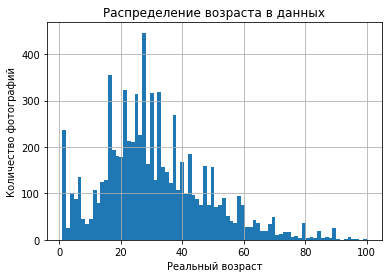

In [8]:
labels.hist(bins=80)
plt.title('Распределение возраста в данных')
plt.xlabel('Реальный возраст')
plt.ylabel('Количество фотографий')
plt.show()

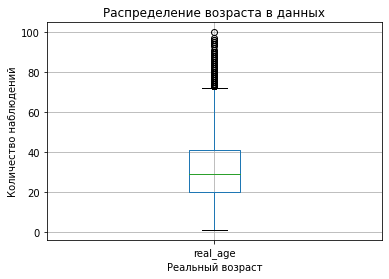

In [9]:
labels.boxplot('real_age')
plt.title('Распределение возраста в данных')
plt.xlabel('Реальный возраст')
plt.ylabel('Количество наблюдений')
plt.show()

In [10]:
print('Минимальный возраст:', labels['real_age'].min())
print('Максимальный возраст:', labels['real_age'].max())
print('Средний возраст:', labels['real_age'].mean())

Минимальный возраст: 1
Максимальный возраст: 100
Средний возраст: 31.20115926755368


Возвраст распределен неравномерно. Большинство фото с маркером возраста от 10до 45 лет. Так встерчаются фото с признаком 1 и 100 лет.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>(добавил в график параметр bins - теперь рельефнее всё видно). А по твоему выводу - 
В общем, да. Добавлю ещё пару строк: видна небольшая бимодальность. Скорее всего, как минимум, замешана ещё одна выборка в данных. Т.е. есть некий признак, который делает гарфик двугорбым). Например школьники здесь и остальные. Т.е. выборка была взята не случайна, а формировалась<br>
Что ещё... пожилых мало.. - это значит плохо обучимся, наверное....<br>
есть младенцы, есть 100 - тут надо посмотерть на эти фото, что там за люди-то такие...<br>


Выведем на экран 16 фотографий

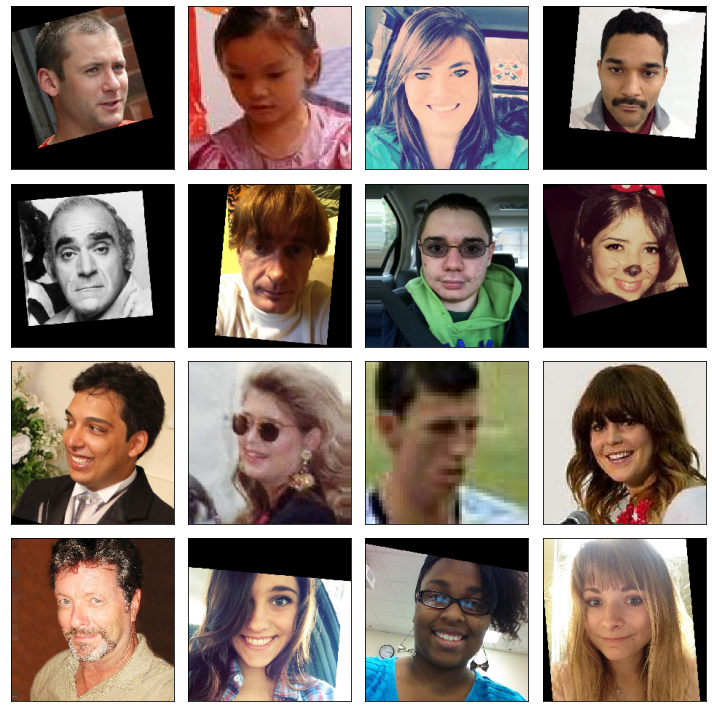

In [11]:
features, target = next(train_datagen_flow)
# выводим 16 изображений
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<br>
Тут можно такую аналитику предоставить:<br>
1) В датасете есть старые и черно-белые фотографии. Имеет смысл делать аугментацию с тем, чтобы делать фотографию черно-белой в некотором проценте случаев (нету в стандартном наборе). Возможно, стоит подкрутить цветовые каналы или яркость<br>

2) В датасете есть фотогарафи, на которых лица изображены под разными углами к вертикальной оси. Имеет смысл делать аугментацию с rotation_range равным +-15-20 градусов в некотором проценте случаев. Поворачивать можно как само изображение так и объект отдельно от фона<br>

3) В датасете есть фотогарафи, на которых лица изображены в полупрофиль. Имеет смысл делать аугментацию с отражением по горизонтали в некотором проценте случаев<br>

4) В датасете есть фотогарафи с разным разрешением. Имеет смысл делать аугментацию с изменением контрастности изображения в некотором проценте случаев<br>

5) В датасете есть фотогарафи, на которых изображены не лица, а голова и часть туловища (иногда человек послностью). Имеет смысл делать аугментацию с обезкой и масштабированием изображения в некотором проценте случаев, чтобы на фото были только лица примерно одного масштаба<br>

# 2. Обучение модели

In [12]:
%%time
def load_train(path):
    labels = pd.read_csv(BytesIO(r.content), sep=';')
    train_datagen = ImageDataGenerator(
                                       validation_split=0.25, 
                                       rescale=1./255,
                                       )
    train_data = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_data
 
 
def load_test(path):
    labels = pd.read_csv(BytesIO(r.content), sep=';')
    test_datagen = ImageDataGenerator(
        validation_split=0.25, 
        rescale=1./255)
    test_data = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_data
 
 
def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
 
    return model
 
def train_model(model, train_data, test_data, batch_size=128, epochs=19, 
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data, validation_data=test_data,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model


path = '/content/drive/MyDrive/Colab Notebooks/15 Проект. Компьютерное зрение: Обработка фотографий покупателей/faces/'
train_data = load_train(path)
test_data = load_test(path)
input_shape = (224,224,3)
model = create_model(input_shape)
train_model(model, train_data, test_data)    

Found 5694 validated image filenames.
Found 1897 validated image filenames.
94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/19
178/178 - 1974s - loss: 241.0930 - mae: 11.0588 - val_loss: 828.9511 - val_mae: 23.9061
Epoch 2/19
178/178 - 72s - loss: 68.7736 - mae: 6.3128 - val_loss: 777.0457 - val_mae: 22.8903
Epoch 3/19
178/178 - 74s - loss: 35.3410 - mae: 4.5661 - val_loss: 241.6782 - val_mae: 11.8665
Epoch 4/19
178/178 - 74s - loss: 23.8443 - mae: 3.7560 - val_loss: 114.3504 - val_mae: 8.0584
Epoch 5/19
178/178 - 74s - loss: 19.5778 - mae: 3.3976 - val_loss: 108.6495 - val_mae: 8.2290
Epoch 6/19
178/178 - 74s - loss: 16.8991 - mae: 3.2030 - val_loss: 76.1092 - val_mae: 6.7667
Epoch 7/19
178/178 - 74s - loss: 16.5436 - mae: 3.1376 - val_loss: 70.5260 - val_mae: 6.4792
Epoch 8/19
178/178 - 74s - loss: 14.9167 - mae: 2.9565 - val_loss: 70.7486 - val_mae: 6.2551
Epoch 9/19
178/178 - 74s - loss: 13.4666 - mae: 2.8322 - val_loss: 90.0299 - val_mae: 7.4592
Epoch 10/1

Mae: 1.95

### Результат обучения модели

В модели мы задали шаг обучения 0,0001, 19 эпох, функцию потерь среднюю квадратичную ошибку и метрику качества среднюю абсолютнаю ошибку.

# 3. Анализ обученной модели

Мы обучили модель для определения возвраста покупателей по фотографии для сетевого супермаркета «Хлеб-Соль». Модель имеет метрику качества Средняя абсолютная ошибка равная 6,68 - это лучше заданного предела (7). Со временем супермаркет накопит базу данных фото своих покупателей и можно будет дообучить модель, что позволит улучшить качество модели и определение возраста станет более точное.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Антон, не простой проект в плане понимания как и почему отбирается модель.<br>
Возможно, и не все тайны этой темы раскрылись перед тобой на этом курсе.<br>
Но, думаю, если надо ты сможешь применить эти знания и, принеобходимости, нарастить.<br>
Как говорила мне в детстве моя бабушка "мужчина не обязательно должен уметь всё делать, но вот знать как делать - должен")))<br>Добавил немного аналитики, посмотри, пожалуйста. Не стал уже из-за неё отправлять. Впереди у тебя ФИНАЛ)<br>
УСПЕХОВ ТАМ!

# Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы